<center><h1>Técnicas de Inteligencia Artificial</header1></center>

Presentado por: Jessie Nikole Contreras  <br>
Fecha: 18/07/2022

# Tema: Predicción de precios de bienes raíces

**Enlace** https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction

# Importación de librerias necesarias

In [2]:
#Para esta actividad se importarán las siguientes librerías:
# Herramientas de gestión de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import seaborn as sns
import os
import warnings

## Cargar el Dataset

In [3]:
#Código para cargar el Dataset
data = pd.read_csv('Real estate.csv')

In [56]:
##Leer la data
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
#Información de la Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


## Descripción de la fuente del Dataset

El dataset esta conformado por 414 datos de imbobiliarios que estan en un mercados  por predecir el precio de cada uno de ellos, por medio de las caracteriticas(7), a la que se incluye una característica de clase (objetivo) 

# Variables 'X'

**No** Número de ID.

**X1 transaction date** Fecha de transacción X1	

**X2 house age** Edad de la casa X2

**X3 distance to the nearest MRT station** X3 distancia a la estación de MRT más cercana

**X4 number of convenience stores** X4 número de tiendas de conveniencia

**X5 latitude** latitud X5	

**X6 longitud** longitud X6 

# Variables 'Y'
**Y house price of unit area** Y precio de la vivienda por unidad de superficie


## Explique el problema a resolver. 

Por medio de siguiente Laboratorio se buscar conocer el modelo de resgresión Lineal que se desarrollan por datos que permita predecir el precio adecuado de bienes raíces en función de sus especificaciones. Para lo cuál se utilizará el dataset descrito en el apartado anterior, el cuál contiene 414 samples. Donde, la variable objetivo se denomina *"Y house price of unit area"*. Existen 8 variables de entrada llamadas: 

*X1 transaction date       
X2 house age                             
X3 distance to the nearest MRT station    
X4 number of convenience stores            
X5 latitude                               
X6 longitude*

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [13]:
#Número de instancias en total.
data.count()

No                                        414
X1 transaction date                       414
X2 house age                              414
X3 distance to the nearest MRT station    414
X4 number of convenience stores           414
X5 latitude                               414
X6 longitude                              414
Y house price of unit area                414
dtype: int64

Número de atributos de entrada, su significado y tipo

**No** Número de ID. Continuous

**X1 transaction date** Fecha de transacción X1. Continuous

**X2 house age** Edad de la casa X2. Continuous

**X3 distance to the nearest MRT station** X3 distancia a la estación de MRT más cercana. Continuous

**X4 number of convenience stores** X4 número de tiendas de conveniencia. Continuous

**X5 latitude** latitud X5. Continuous	

**X6 longitud** longitud X6. Continuous

In [14]:
#muestra la información (incluido el tipo de dato) de los 7 atributos de entrada.
data.drop('Y house price of unit area', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


<AxesSubplot:>

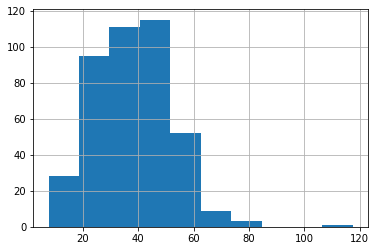

In [15]:
%matplotlib inline
#Crear gráfico de barras como la variable objetivo (tipo) continua.
data['Y house price of unit area'].hist()

In [16]:
#Código que responde a la descripción anterior
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


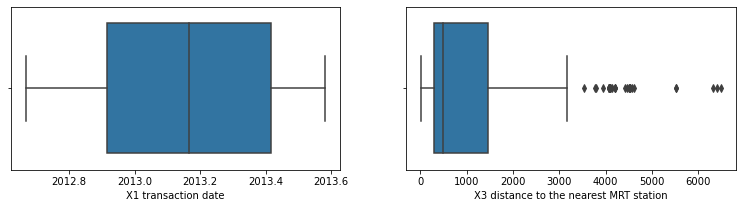

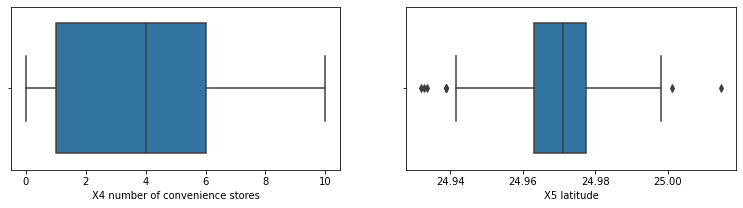

In [55]:
num_cols = ['X1 transaction date', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude','Y house price of unit area']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])

    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1
    
    plt.show()
    
    ##GRAFICA DE LOS CUARTILES

In [29]:
#Encontrando valores únicos para cada columna para comprender qué columna es categórica y cuál es continua
#Por lo general, si el número de valores únicos es < 20, es probable que la variable sea una categoría que, de otro modo, sería continua
data.nunique()

No                                        414
X1 transaction date                        12
X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
X5 latitude                               234
X6 longitude                              232
Y house price of unit area                270
dtype: int64

In [18]:
data.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [19]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [20]:

# Variable objetivo y variables de entrada
VariableObjetivo=['Y house price of unit area']
VariablesEntrada=['No', 'X1 transaction date', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude','Y house price of unit area']

In [21]:
X=data[VariablesEntrada].values
y=data[VariableObjetivo].values

In [22]:
### Estandarización de la data ###
from sklearn.preprocessing import StandardScaler
VariablesEntradaScaler=StandardScaler()
VariableObjetivoScaler=StandardScaler()

In [23]:
#Almacenamiento del objeto de ajuste para referencia posterior
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [24]:
#Generación de los valores estandarizados de X e y
X=VariablesEntradaFit.transform(X)
y=VariableObjetivoFit.transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [25]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [35]:
#Comprobación rápida del tamaño de los conjuntos de datos de entrenamiento y prueba
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(289, 7)
(289, 1)
(125, 7)
(125, 1)


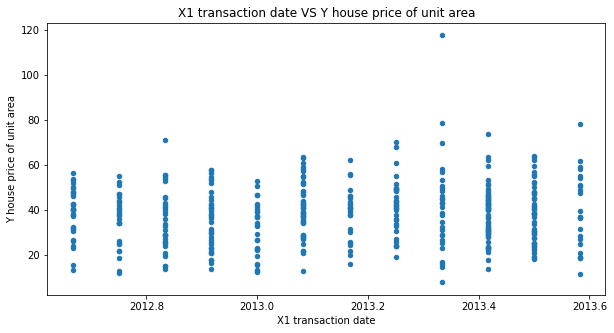

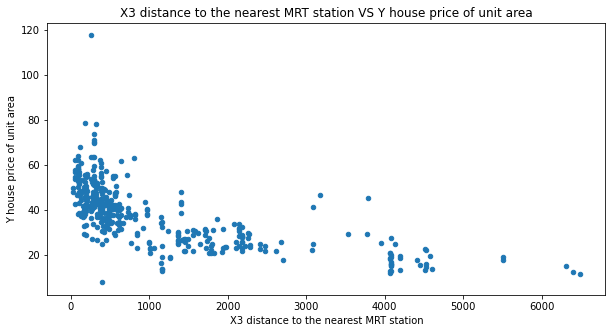

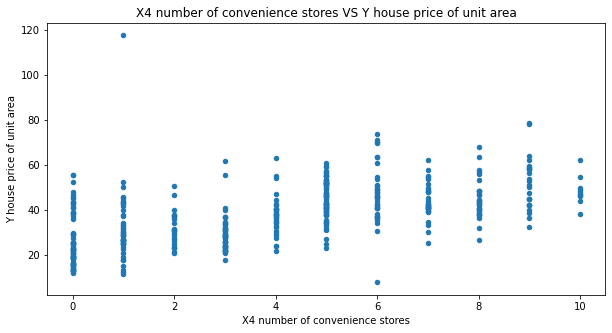

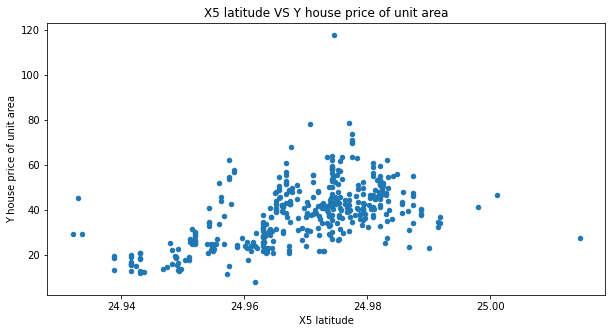

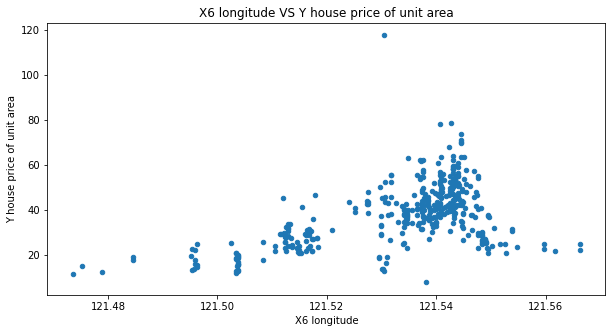

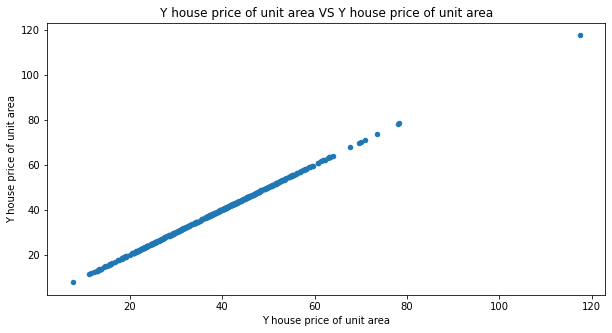

In [31]:
ContinuousCols=['X1 transaction date', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude','Y house price of unit area']

# Plotting scatter chart por cada variable de entrada vs varible objetivo
for predictor in ContinuousCols:
    data.plot.scatter(x=predictor, y='Y house price of unit area', figsize=(10,5), title=predictor+" VS "+ 'Y house price of unit area')


### Selección de caracteristicas (continua vs continua) utilizando el valor de correlación

In [33]:
# Cálculo de la matriz de correlación
ContinuousCols=['X1 transaction date', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude','Y house price of unit area']

#Creación de la matriz de correlación
CorrelationData=data[ContinuousCols].corr()
CorrelationData

,X1 transaction date,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.060880,0.009635,0.035058,-0.041082,0.087491
X3 distance to the nearest MRT station,0.060880,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.673613,0.571005,0.546307,0.523287,1.000000


In [34]:
# Filtrando solo aquellas columnas donde la correlación absoluta > 0.5 con la variable objetivo
CorrelationData['Y house price of unit area'][abs(CorrelationData['Y house price of unit area']) > 0.5 ]

X3 distance to the nearest MRT station   -0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
Y house price of unit area                1.000000
Name: Y house price of unit area, dtype: float64

## Regresión Lineal

In [36]:
#Códo del modelo
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Imprimiendo todos los parámetros de regresión lineal
print(RegModel)

# Creando el modelo en datos de entrenamiento
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

LinearRegression()


In [37]:
#Entrenamiento
from sklearn import metrics
# Medición de ajuste en datos de entrenamiento
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Validación de modelos y cálculos de precisión ##########')

R2 Value: 1.0

##### Validación de modelos y cálculos de precisión ##########


In [42]:
# Imprimir algunos valores de muestra de predicción
TestingDataResults=pd.DataFrame(data=X_test, columns=VariablesEntrada)
TestingDataResults[VariableObjetivo]=y_test
TestingDataResults[('Predicted'+'Y house price of unit area')]=np.round(prediction)

## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 

In [41]:
# Impresión de valores muestra de la predicción
print(TestingDataResults[['No', 'X1 transaction date', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude','Y house price of unit area']].head())

# Cálculo del error para cada fila
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Y house price of unit area']-TestingDataResults['X3 distance to the nearest MRT station']))/TestingDataResults['Y house price of unit area'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy de test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy de test data:', MedianAccuracy)

#Accuracy Score
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Cálculo MAPE de puntuación personalizada
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importación de la función de validación cruzada de sklearn
from sklearn.model_selection import cross_val_score

# Ejecutar validación cruzada de 10 veces en un algoritmo dado
# Pasar datos completos X e y porque el K-fold dividirá los datos y automáticamente elegirá entrenar/probar
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nValores de precisión para la validación cruzada de 10 veces:\n',Accuracy_Values)
print('\nPrecisión media final del modelo:', round(Accuracy_Values.mean(),2))

         No  X1 transaction date  X3 distance to the nearest MRT station  \
0  1.518687             1.246435                                0.926596   
1 -0.874395            -0.234250                               -0.706261   
2 -0.163165            -0.528967                                1.582036   
3 -0.372350            -1.416667                                2.366126   
4 -0.974804            -1.121951                               -0.642457   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                        -0.032020    -0.763205     -1.293728   
1                         0.647789    -0.267851      0.491167   
2                        -1.391638    -1.160939      2.146891   
3                        -1.391638    -2.102433     -1.953278   
4                        -1.051734     0.465497     -0.180778   

   Y house price of unit area  
0                   -0.785884  
1                    1.208223  
2                   -1.175875  
3                   -1.9